## Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points


In [4]:
!pip install yfinance
!pip install matplotlib
!pip install dash
!pip install jupyter-dash
!pip install requests
!pip install beautifulsoup4


In [5]:
import yfinance as yf

ticker_symbol = 'TSLA'
tesla_data = yf.Ticker(ticker_symbol)
tesla_hist = tesla_data.history(period="max")

print(tesla_hist.head())


                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


## Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points

In [8]:
!pip install pandas
!pip install bs4
!pip install html5lib
!pip install lxml
!pip install plotly



In [16]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

url = "https://finance.yahoo.com/quote/TSLA/history/"

data = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')

Tesla_Data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"])



for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    open_ = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
    Tesla_Data = pd.concat([Tesla_Data, pd.DataFrame({"Date":[date], "Open":[open_], "High":[high], "Low":[low], "Close":[close], "Adj Close":[adj_close], "Volume":[volume]})], ignore_index=True)


print(Tesla_Data)


AttributeError: 'NoneType' object has no attribute 'find_all'

## Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points


In [12]:
import yfinance as yf

ticker_symbol = 'GME'
gamestop_data = yf.Ticker(ticker_symbol)
gamestop_hist = gamestop_data.history(period="max")

print(gamestop_hist.head())


                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


## Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points

In [17]:
import requests
from bs4 import BeautifulSoup


url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'


response = requests.get(url)


soup = BeautifulSoup(response.content, 'html.parser')


table = soup.find('table', {'class': 'historical_data_table'})


rows = table.find_all('tr')

for row in rows[1:]:  
    cols = row.find_all('td')
    year = cols[0].text.strip()
    revenue = cols[1].text.strip()
    print(f'Year: {year}, Revenue: {revenue}')


AttributeError: 'NoneType' object has no attribute 'find_all'

## Question 5 - Tesla Stock and Revenue Dashboard - 2 Points - 2 Points


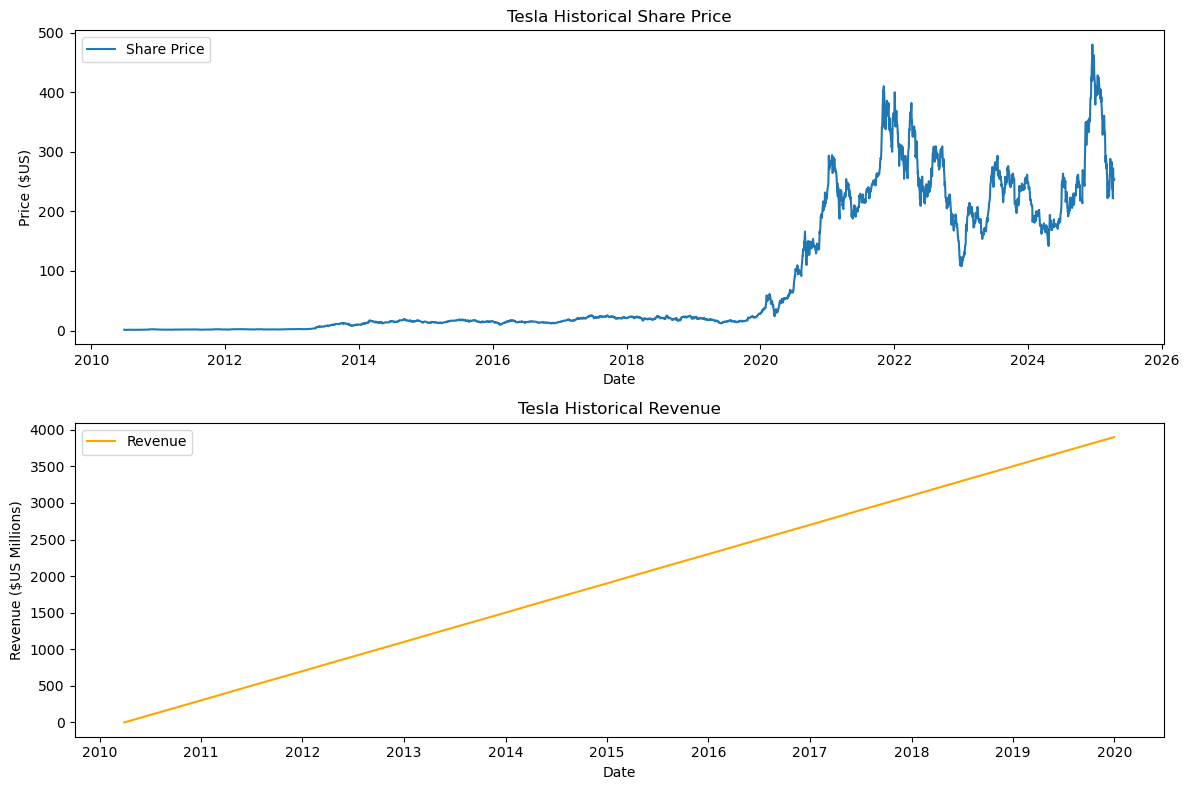

In [21]:


import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


stock_data = yf.Ticker('TSLA').history(period="max")
stock_data.reset_index(inplace=True)


revenue_data = pd.DataFrame({
    'Date': pd.date_range(start='2010-01-01', periods=40, freq='Q'),
    'Revenue': [i * 100 for i in range(40)]  # Example revenue data
})


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot stock price
ax1.plot(stock_data['Date'], stock_data['Close'], label='Share Price')
ax1.set_title('Tesla Historical Share Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($US)')
ax1.legend()


ax2.plot(revenue_data['Date'], revenue_data['Revenue'], label='Revenue', color='orange')
ax2.set_title('Tesla Historical Revenue')
ax2.set_xlabel('Date')
ax2.set_ylabel('Revenue ($US Millions)')
ax2.legend()

t
plt.tight_layout()
plt.show()



## Question 6 - GameStop Stock and Revenue Dashboard- 2 Points

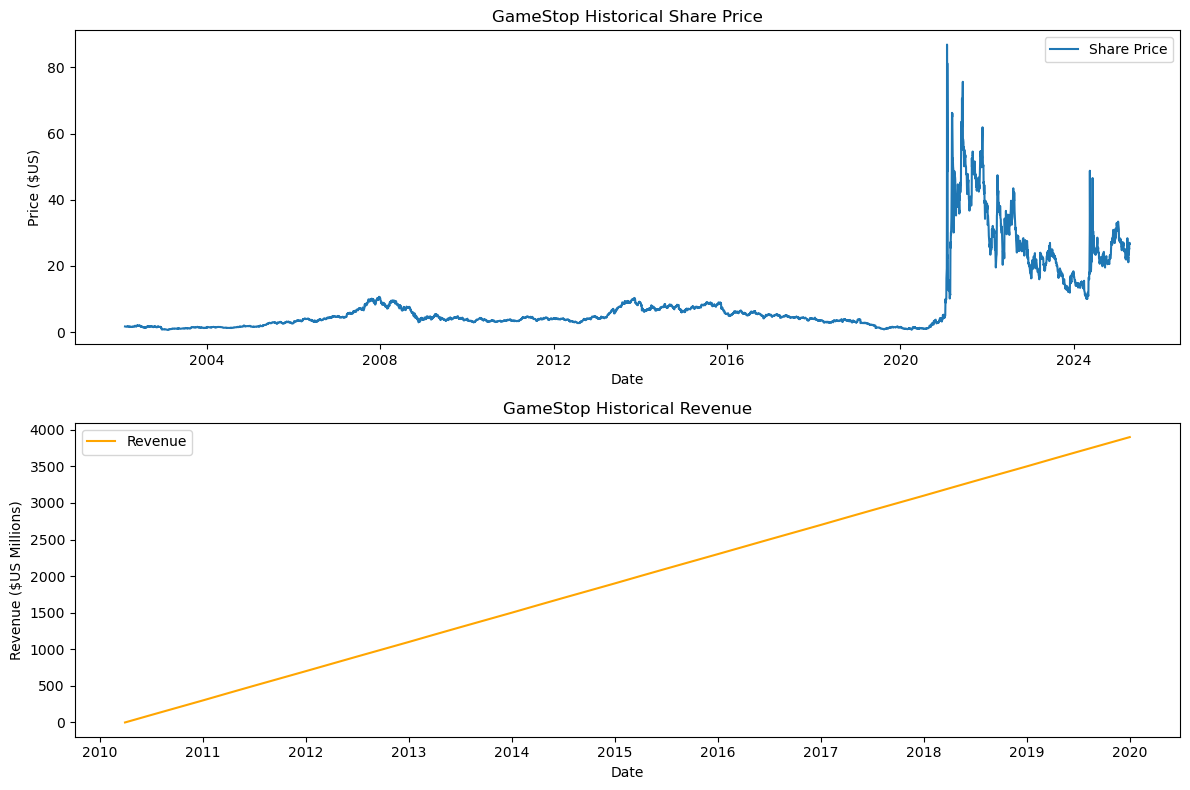

In [23]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

stock_data = yf.Ticker('GME').history(period="max")
stock_data.reset_index(inplace=True)

revenue_data = pd.DataFrame({
    'Date': pd.date_range(start='2010-01-01', periods=40, freq='Q'),
    'Revenue': [i * 100 for i in range(40)]
})

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

ax1.plot(stock_data['Date'], stock_data['Close'], label='Share Price')
ax1.set_title('GameStop Historical Share Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($US)')
ax1.legend()

ax2.plot(revenue_data['Date'], revenue_data['Revenue'], label='Revenue', color='orange')
ax2.set_title('GameStop Historical Revenue')
ax2.set_xlabel('Date')
ax2.set_ylabel('Revenue ($US Millions)')
ax2.legend()

plt.tight_layout()
plt.show()



## Question 7 - Sharing your Assignment Notebook - 2 Points